# Project to Convert PNG containing a funtion plot to a CSV file

This specifically is being worked to read two utility transformer charts froma PDF 

https://www.elstersolutions.com/assets/downloads/Toronto_Hydro_Transformer_Monitors.pdf

The motive is to gather realistic looking tranformer data in order to synthesize more of it
for proving that a DL algo can detect anamolies in such signals


# Some Utility Functions for Images

In [114]:
%%bash
cd ~
pwd 
ls



/gpfs/fs01/user/s37a-6a8375ad9b78b5-6459f7095f24
data
datasets
events
logs
notebook
scikit_learn_data
stderr.log
stdout.log


In [30]:
import os, sys


print("Path at terminal when executing this file")
print(os.getcwd() + "\n")

__file__ = 'TorontoBlue.png'
print("This file path, relative to os.getcwd()")
print(__file__ + "\n")

print("This file full path (following symlinks)")
full_path = os.path.realpath(__file__)
print(full_path + "\n")

print("This file directory and name")
path, filename = os.path.split(full_path)
print(path + ' --> ' + filename + "\n")

print("This file directory only")
print(os.path.dirname(full_path))




Path at terminal when executing this file
/gpfs/global_fs01/sym_shared/YPProdSpark/user/s37a-6a8375ad9b78b5-6459f7095f24/notebook/work

This file path, relative to os.getcwd()
TorontoBlue.png

This file full path (following symlinks)
/gpfs/global_fs01/sym_shared/YPProdSpark/user/s37a-6a8375ad9b78b5-6459f7095f24/notebook/work/TorontoBlue.png

This file directory and name
/gpfs/global_fs01/sym_shared/YPProdSpark/user/s37a-6a8375ad9b78b5-6459f7095f24/notebook/work --> TorontoBlue.png

This file directory only
/gpfs/global_fs01/sym_shared/YPProdSpark/user/s37a-6a8375ad9b78b5-6459f7095f24/notebook/work


In [2]:
from PIL  import Image

def RGBToHTMLColor(rgb_tuple):
    """ convert an (R, G, B) tuple to #RRGGBB """
    hexcolor = '#%02x%02x%02x' % rgb_tuple
    # that's it! '%02x' means zero-padded, 2-digit hex values
    return hexcolor

def HTMLColorToRGB(colorstring):
    """ convert #RRGGBB to an (R, G, B) tuple """
    colorstring = colorstring.strip()
    if colorstring[0] == '#': colorstring = colorstring[1:]
    if len(colorstring) != 6:
        raise Exception(ValueError, "input #%s is not in #RRGGBB format" % colorstring)
    r, g, b = colorstring[:2], colorstring[2:4], colorstring[4:]
    r, g, b = [int(n, 16) for n in (r, g, b)]
    return (r, g, b)

def HTMLColorToPILColor(colorstring):
    """ converts #RRGGBB to PIL-compatible integers"""
    colorstring = colorstring.strip()
    while colorstring[0] == '#': colorstring = colorstring[1:]
    # get bytes in reverse order to deal with PIL quirk
    colorstring = colorstring[-2:] + colorstring[2:4] + colorstring[:2]
    # finally, make it numeric
    color = int(colorstring, 16)
    return color

def PILColorToRGB(pil_color):
    """ convert a PIL-compatible integer into an (r, g, b) tuple """
    hexstr = '%06x' % pil_color
    # reverse byte order
    r, g, b = hexstr[4:], hexstr[2:4], hexstr[:2]
    r, g, b = [int(n, 16) for n in (r, g, b)]
    return (r, g, b)

def PILColorToHTMLColor(pil_integer):
    return RGBToHTMLColor(PILColorToRGB(pil_integer))

def RGBToPILColor(rgb_tuple):
    return HTMLColorToPILColor(RGBToHTMLColor(rgb_tuple))

def getRGBTupleFromImg(file_obj, coords=(0,0)):
    """ 
    Extract an #RRGGBB color string from given pixel coordinates
    in the given file-like object.
    """
    pil_img = Image.open(file_obj)
    pil_img = pil_img.convert('RGB')
    rgb = pil_img.getpixel(coords)
    return rgb

if __name__ == '__main__':
    htmlcolor = '#ff00cc'
    pilcolor = HTMLColorToPILColor(htmlcolor)
    rgb = HTMLColorToRGB(htmlcolor)
    print (pilcolor)
    print (htmlcolor)
    print (rgb)
    print (PILColorToHTMLColor(pilcolor))
    print (PILColorToRGB(pilcolor))
    print (RGBToPILColor(rgb))
    print (RGBToHTMLColor(rgb) )
    print()
    #img = open('/tmp/bkg.gif', 'r')
    #print getRGBTupleFromImg(img, (0,0))

13369599
#ff00cc
(255, 0, 204)
#ff00cc
(255, 0, 204)
13369599
#ff00cc
()


# Read the png file convert data to Pandas Dataframe

In [26]:

import ibmos2spark

# @hidden_cell
credentials = {
    'auth_url': 'https://identity.open.softlayer.com',
    'project_id': '4c4e226d8e5e4fbe898f378060f59daa',
    'region': 'dallas',
    'user_id': 'bcc4bcaa5c5a4658a6cc5904fa6b76ef',
    'username': 'member_7acbfd2665aad558982f2c5c8bc113c09b760fc9',
    'password': 'y}&}f)2S68jCj7ac'
}

configuration_name = 'os_e8cf95d1871249f5a07b143d737452a3_configs'
bmos = ibmos2spark.bluemix(sc, credentials, configuration_name)

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
# Please read the documentation of PySpark to learn more about the possibilities to load data files.
# PySpark documentation: https://spark.apache.org/docs/2.0.1/api/python/pyspark.sql.html#pyspark.sql.SparkSession
# The SparkSession object is already initalized for you.
# The following variable contains the path to your file on your Object Storage.
path_1 = bmos.url('DefaultProjectrobertachesebroughibmcom', 'TorontoBlue.png')


In [32]:
#!/usr/bin/env python
 
from __future__ import with_statement
from PIL  import Image

#path = os.path.join('datasets' , 'transformer', 'TorontoBlue.png')
im = Image.open('full_path~/TorontoBlue.png') #relative path to file
 
#load the pixel info
pix = im.load()
 
#get a tuple of the x and y dimensions of the image
width, height = im.size
 
#open a file to write the pixel data
with open('output_file.csv', 'w+') as f:
  f.write('X,Y,R,G,B\n')
 
  #read the details of each pixel and write them to the file
  for x in range(width):
    for y in range(height):
      r =  pix[x,y][0]
      g =  pix[x,y][1]
      b =  pix[x,y][2]
      f.write('{0},{1},{2},{3},{4}\n'.format(x,273-y,r,g,b))

IOError: [Errno 2] No such file or directory: 'full_path~/TorontoBlue.png'

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('output_file.csv')
df.head()

,X,Y,R,G,B
0,0,273,255,255,255
1,0,272,255,255,255
2,0,271,255,255,255
3,0,270,255,255,255
4,0,269,255,255,255


# Plot image in question

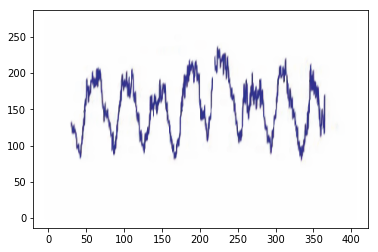

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


x = df.X.tolist()
y = df.Y.tolist()
colors = list(zip( (df.R/256).tolist(), (df.G/256).tolist(), (df.B/256).tolist()))


plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()


# Scatterplot of raw data

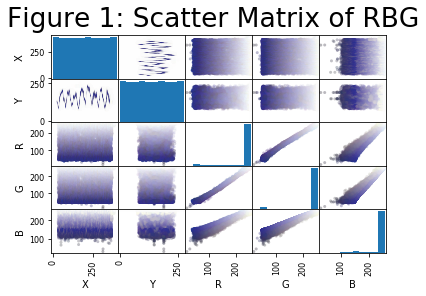

In [5]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Figure 1
# color the plot by the Churn variable
# attributes are the index of Principal components to plot against each other
attributes = ['X', 'Y', 'R','G','B']
colors = zip((df.R/256).tolist(), (df.G/256).tolist(), (df.B/256).tolist() )
#colors = zip((df.R/256).tolist(), (df.G/256).tolist(), (df.B/256).tolist() )
#attributes = [item + 10 for item in attributes]   # mthod to add if you want to look at the least significant components
#churn_colors=['black', 'blue']
# make a scatter plot
scatter_matrix(df[attributes], alpha =.3, c=colors)
#scatter_matrix(df[attributes], alpha =.3, marker='x',c=df.Churn.apply(lambda x:churn_colors[x]), figsize=[16,16])
#scatter_matrix(pcomps[attributes], alpha =.3, marker='x',c=churn_cat_encode_new2.InternetService0.astype('int').apply(lambda x:churn_colors[x]), figsize=[16,16])
plt.rcParams.update({'font.size': 22})
plt.suptitle("Figure 1: Scatter Matrix of RBG")
plt.show()

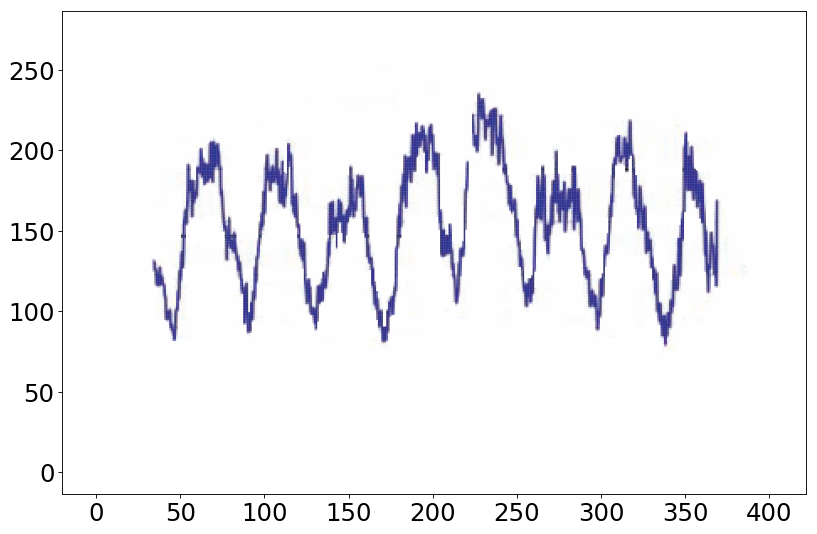

In [6]:
attributes = ['X', 'B']
colors = zip((df.R/256).tolist(), (df.G/256).tolist(), (df.B/256).tolist() )
#scatter_matrix(df[attributes], alpha =.3, c=colors)
#colors = np.random.rand(N)
area = 1
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(df.X, df.Y, s=area, c=colors)

plt.show()


# Experiment w PCA 

In [7]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
df1 = df.drop(['X', 'Y'], axis=1)
#.drop('Y', axis=1)
scaler = preprocessing.StandardScaler().fit(df1)
X_scaled = preprocessing.scale(df1, with_mean=True, with_std=True )   # same as (df-df.mean())/df.std(ddof=0)
# start w n_components principal components and see how much variance that gives me
n_components = 3
# create instance of PCA (constructor)
pca = PCA(n_components=n_components)
#pca = PCA(copy=True, iterated_power='auto', n_components=n_components, random_state=None, svd_solver='auto', tol=0.0, whiten=False) 
pca.fit(X_scaled)
X_scaled = pca.transform(X_scaled)  #get the actual principal components as vectors
print(pca.explained_variance_ratio_) 

[9.93720619e-01 5.99011910e-03 2.89262190e-04]


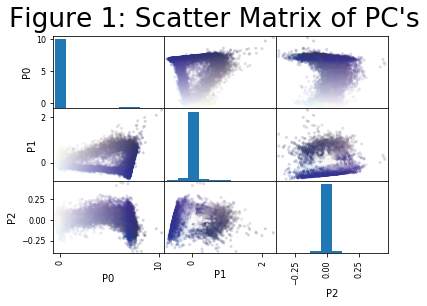

In [8]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
colors = zip((df.R/256).tolist(), (df.G/256).tolist(), (df.B/256).tolist() )
Col_headings = ['P'+str(x) for x in range(n_components)]
pcomps = pd.DataFrame(X_scaled, columns = Col_headings) 
# Figure 1
# color the plot by the Churn variable
# attributes are the index of Principal components to plot against each other
#colors = ['R','G','B']
#attributes = [item + 10 for item in attributes]   # mthod to add if you want to look at the least significant components
#churn_colors=['black', 'blue']
# make a scatter plot
scatter_matrix(pcomps, alpha =.2, c=colors)
#scatter_matrix(df[attributes], alpha =.3, marker='x',c=df.Churn.apply(lambda x:churn_colors[x]), figsize=[16,16])
#scatter_matrix(pcomps[attributes], alpha =.3, marker='x',c=churn_cat_encode_new2.InternetService0.astype('int').apply(lambda x:churn_colors[x]), figsize=[16,16])
plt.rcParams.update({'font.size': 22})
plt.suptitle("Figure 1: Scatter Matrix of PC's")
plt.show()

In [9]:
#pcomps[(pcomps['P0']>0)<(pcomps['P1']<0)]

# Experiment with DBScan to find color clusters automatically

In [ ]:
eps = .01

def pdutil_dbscan(df, eps_):
# Compute DBSCAN   # PCA False, min_sampels 49, eps 32
    min_samples = 100
    labels = []
    db = DBSCAN(eps=eps_, min_samples=min_samples).fit(df)
    labels = pd.DataFrame(db.labels_ )
    #n_clusters_ = labels[0].madf()
    n_clusters_ = len(list(set(db.labels_))) - (1 if -1 in db.labels_ else 0)
    # Number of clusters in labels, ignoring noise if present.
    tdft = 'dbsPCA'
    df[tdft]=labels
    print('eps:{} Estimated number of clusters: {}'.format(eps_, n_clusters_) ) 
    return df, labels, n_clusters_

### import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

#np.random.seed(42)
number_of_eigens = 3
#subset_cols = X.columns[:10]
#pcomps2, labels, n_clusters = pdutil_dbscan(X[subset_cols], 4.2)  # call pd_dbscan with df=X, eps = 4

subset_cols = colors 

pcomps, labels, n_clusters = pdutil_dbscan(df1, eps)  # call pd_dbscan with df=X, eps = 4

dbsPCA_hist = pcomps.dbsPCA
print('Outliers: {}:   Estimated number of clusters: {}'.format(  dbsPCA_hist.tolist().count(-1),  n_clusters) )
plt.hist( dbsPCA_hist)
plt.title("dbsPCA_hist")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.axis([-1,n_clusters,0,1000])
plt.show()
print pcomps.groupby('dbsPCA').size()

In [ ]:
cluster = 1
idx = pcomps[pcomps.dbsPCA==cluster].index
idx2 = idx.tolist()
print len(idx2)
print df.iloc[idx2[0]]

In [ ]:
import matplotlib.patches as mpatches
import matplotlib
import matplotlib.pyplot as plt

cluster = 1

fig = plt.figure()
ax = fig.add_subplot(111)

idx = pcomps[pcomps.dbsPCA==cluster].index
idx2 = idx.tolist()
print len(idx2)
print df.iloc[idx2[0]]

def label(xy, text):
    y = xy[1] - 0.15 # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=14)
    
mask = df  #df[((df.B -150)*(df.B -150) < 300) & (df.Y < 230) & (df.X > 35)  ]
x = mask.X
y = mask.Y

#colors = np.random.rand(N)
area = 1
c = df.iloc[idx2[0]]
#plt.figure(figsize=(12, 8), dpi=80)
#plt.scatter(x, y, s=area, c=RGBToHTMLColor((c.R,c.G,c.B)), alpha=0.5)

# add a rectangle
rect2 = mpatches.Rectangle((-300,-300), 300, 400, color=RGBToHTMLColor((c.R,c.G,c.B)))
ax.add_patch(rect2)
#patches.append(rect)
plt.xlim([-400, 200])
plt.ylim([-400, 200])
plt.show()

In [ ]:
from IPython.display import Image
i = Image(filename='TorontoRed.png')
i

# Experiment with converting data to image for CNN consumption

In [ ]:

from PIL import Image
import random

data = [random.choice((0, 1)) for _ in range(2500)]
data[:] = [data[i:i + 50] for i in range(0, 2500, 50)]
#print data

img = Image.new('1', (50, 50))
pixels = img.load()

for i in range(img.size[0]):
    for j in range(img.size[1]):
        pixels[i, j] = data[i][j]

img.show()
img.save('/tmp/image.png')
from IPython.display import display
from PIL import Image

from IPython.display import Image
path="/tmp/image.png"
i = Image(filename=path)
i

In [ ]:
colors


In [ ]:
%matplotlib inline

area = 1

import numpy as np
import matplotlib.pyplot as plt


#colors = np.random.rand(N)
plt.figure(figsize=(12, 8), dpi=80)
cluster = [0]
x = df[pcomps.dbsPCA > cluster].X
y = df[pcomps.dbsPCA > cluster].Y
plt.scatter(x, y, s=area, alpha=0.5)

plt.show()

In [ ]:
cluster = 1
#mask = df[(df.B > 125) & (df.B < 150) & (df.R > 125) & (df.R < 150) & (df.G > 125) & (df.G < 150)]
mask = df

x = df.index
y1 = df.R
y2 = df.G
y3 = df.B

#colors = np.random.rand(N)
area = 1
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(y1, y2, s=area, c='red', alpha=0.33)
plt.scatter(y1, y3, s=area, c='green', alpha=0.33)
plt.scatter(y2, y3, s=area, c='blue', alpha=0.33)

plt.show()

In [ ]:
raw_data = {'name': ['Willard Morris', 'Al Jennings', 'Omar Mullins', 'Spencer McDaniel'],
                'age': [20, 19, 22, 21],
                'favorite_color': ['blue', 'blue', 'yellow', "green"],
                'grade': [88, 92, 95, 70]}

df3 = pd.DataFrame(raw_data)
df3.head()

df3.loc[df3['favorite_color'] == 'yellow']
df3.columns